In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import scipy

In [2]:
  dataset = datasets.load_iris()
  print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
 features = dataset.data
 target =  dataset.target

 features.shape, target.shape
 

((150, 4), (150,))

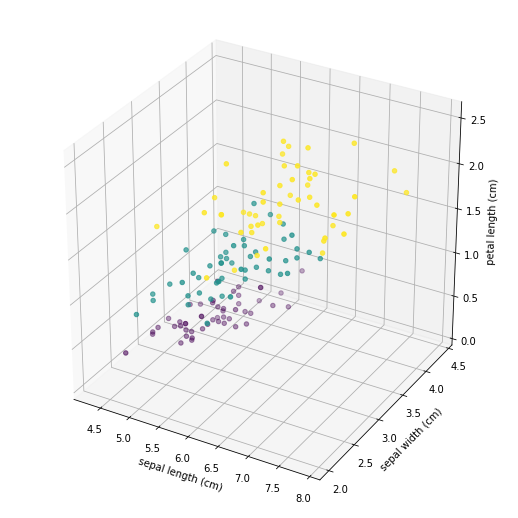

In [4]:
figure = plt.figure(figsize=(7,7))
axes = Axes3D(figure)
axes.scatter(features[:,0],features[:,1],features[:,3],c = target)
axes.set_xlabel(dataset.feature_names[0])
axes.set_ylabel(dataset.feature_names[1])
axes.set_zlabel(dataset.feature_names[2])

plt.show()

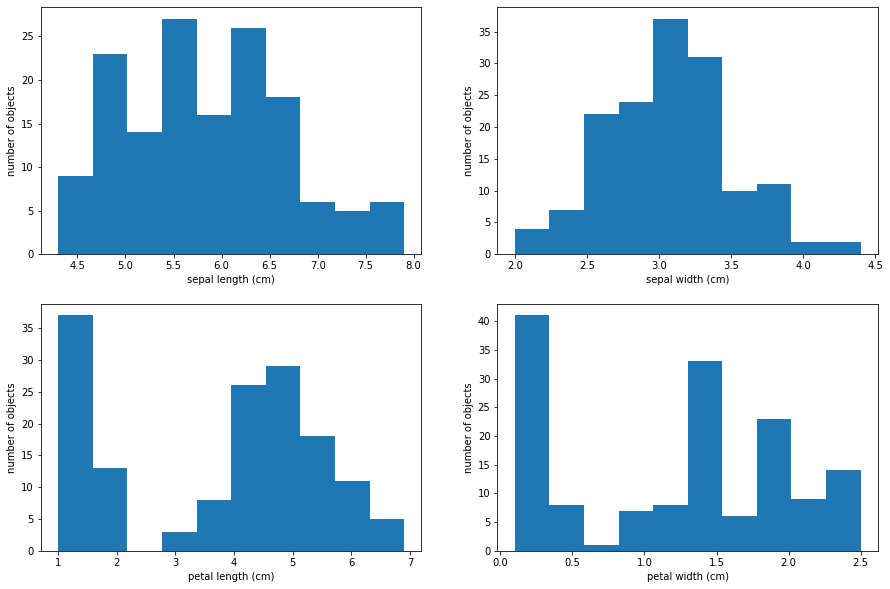

In [5]:
#feature distributions
fig, axes = plt.subplots(2,2,figsize = (15,10))
for i,axis in enumerate(axes.flat):
  axis.hist(features[:,i])
  axis.set_xlabel(dataset.feature_names[i])
  axis.set_ylabel('number of objects')

In [6]:
class GaussDist:
  def __init__(self,feature):
    self.mean = feature.mean()
    self.std = feature.std()

  def log_proba(self,value):
    return -(pow(value-self.mean,2)/(2.*self.std**2))-np.log(self.std) - 0.5*np.log(2.*np.pi)
  
  def proba(self,value):
    return np.exp(self.log_proba(value))
  


In [7]:
a = scipy.stats.norm(loc = features[:,2].mean(), scale = features[:,2].std())

In [8]:
a.std()

1.759404065775303

In [9]:
a.pdf(features[:5,2])

array([0.09236407, 0.09236407, 0.0854514 , 0.09951395, 0.09236407])

In [10]:
GaussDist(features[:,2]).proba(features[:5,2])


array([0.09236407, 0.09236407, 0.0854514 , 0.09951395, 0.09236407])

In [11]:
from scipy.special import logsumexp 

In [16]:
class NaiveBayes():
  def fit(self,data,labels,distribution = None):
    self.unique_labels = np.unique(labels)
    distributions = distribution or [GaussDist] * data
    self.label_likehood = {} #P(x|y)
    for label in self.unique_labels:
      dist_for_col = []
      for col_index in range(data.shape[1]):
        feature_column = data[labels == label, col_index]
        distr = distributions[col_index](feature_column)
        dist_for_col.append(distr)
      self.label_likehood[label] = dist_for_col

    self.label_prior = {
        label : sum((labels==label).astype(float))/len(labels)
        for label in self.unique_labels
    } #P(y)

  def predict_log_proba(self, batch):
    log_proba_for_class = np.zeros((batch.shape[0],len(self.unique_labels)))
    for label_index, label in enumerate(self.unique_labels):
      for index in range(batch.shape[1]):
        log_proba_for_class[:,label_index] += self.label_likehood[label][index].log_proba(batch[:,index])
      log_proba_for_class[:,label_index] += np.log(self.label_prior[label])
    
    for index in range(batch.shape[1]):
      log_proba_for_class -= logsumexp(log_proba_for_class, axis = 1)[:, None] #P(x)
    return log_proba_for_class


In [17]:
naiveBayes = NaiveBayes()
naiveBayes.fit(features,target,distribution = [GaussDist]*4)

In [18]:
naiveBayes_proba =  naiveBayes.predict_log_proba(features)
np.exp(naiveBayes_proba)

array([[1.00000000e+000, 1.35784018e-018, 7.11282484e-026],
       [1.00000000e+000, 1.51480506e-017, 2.34819724e-025],
       [1.00000000e+000, 1.07303991e-018, 2.34026450e-026],
       [1.00000000e+000, 1.46619287e-017, 2.95492312e-025],
       [1.00000000e+000, 4.53291077e-019, 2.88389553e-026],
       [1.00000000e+000, 1.49094089e-014, 1.75751913e-021],
       [1.00000000e+000, 1.10262518e-017, 2.71144331e-025],
       [1.00000000e+000, 6.53643441e-018, 2.77335913e-025],
       [1.00000000e+000, 9.42225434e-018, 1.20442996e-025],
       [1.00000000e+000, 3.42347739e-018, 1.20750496e-025],
       [1.00000000e+000, 4.38089678e-018, 5.06829695e-025],
       [1.00000000e+000, 1.65766653e-017, 7.24747726e-025],
       [1.00000000e+000, 1.27572898e-018, 3.28718487e-026],
       [1.00000000e+000, 7.73740980e-020, 1.86207725e-027],
       [1.00000000e+000, 2.43525947e-019, 8.23626796e-026],
       [1.00000000e+000, 3.04074000e-017, 1.66211220e-023],
       [1.00000000e+000, 5.42610249e-017